# LIBRARIES AND DEPENDENCIES

In [1]:
!pip install --user --upgrade google-api-python-client
!pip install --user pandas-gbq -U

     ---------------------------------------- 11.3/11.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB 2.7 MB/s eta 0:00:00
  Using cached google_api_core-2.11.0-py3-none-any.whl (120 kB)
  Using cached googleapis_common_protos-1.59.0-py2.py3-none-any.whl (223 kB)



[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: C:\Users\luish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached pandas_gbq-0.19.1-py2.py3-none-any.whl (25 kB)
  Using cached db_dtypes-1.1.1-py2.py3-none-any.whl (14 kB)
  Using cached google_cloud_bigquery_storage-2.19.1-py2.py3-none-any.whl (190 kB)
     -------------------------------------- 218.4/218.4 kB 3.4 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
     ---------------------------------------- 20.6/20.6 MB 9.2 MB/s eta 0:00:00
  Using cached pydata_google_auth-1.7.0-py2.py3-none-any.whl (14 kB)
     ---------------------------------------- 77.7/77.7 kB 4.2 MB/s eta 0:00:00
  Using cached google_cloud_core-2.3.2-py2.py3-none-any.whl (29 kB)
  Using cached proto_plus-1.22.2-py3-none-any.whl (47 kB)
  Using cached grpcio_status-1.54.0-py3-none-any.whl (5.1 kB)
     ------------------------------------- 420.6/420.6 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: prot

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.22.3 which is incompatible.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.22.3 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: C:\Users\luish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas_gbq
from google.cloud import bigquery
from functions import *

%load_ext google.cloud.bigquery
# Set your default project here
pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=FYM2gdrxGu1vcTk79Iy9Tcvh2De217&access_type=offline&code_challenge=6pFFYkwTzZMERWrqS9YL2eH3vVt10aEzBmQhoJFDIog&code_challenge_method=S256


Credentials saved to file: [C:\Users\luish\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Cannot find a quota project to add to ADC. You might receive a "quota exceeded" or "API not enabled" error. Run $ gcloud auth application-default set-quota-project to add a 

# CUSTOMER

In [4]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_customer 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


,CUSTOMER_ACCOUNT_NR_MASK,GENDER,FAMILY_MEMBERS,CP4,seg_lifestyle_cd,seg_lifestyle_dsc,SEG_AGE,SEG_AGE_DSC,seg_lifestage_cd,seg_lifestage_dsc
0,12655714,F,4,4430,1,Qualidade,SA_7,>65,2,Senior
1,561449,M,1,8365,2,Família,SA_7,>65,2,Senior
2,9934137,M,5,1500,3,Preço,SA_7,>65,2,Senior
3,8887927,M,2,4430,2,Família,SA_7,>65,2,Senior
4,1863271,F,4,2745,1,Qualidade,SA_7,>65,2,Senior
...,...,...,...,...,...,...,...,...,...,...
995,11663702,M,3,8375,2,Família,SA_7,>65,2,Senior
996,2368756,F,2,8200,2,Família,SA_7,>65,2,Senior
997,1352311,F,2,0000,2,Família,SA_7,>65,2,Senior
998,10977457,F,1,8000,1,Qualidade,SA_7,>65,2,Senior


# LOCATION

In [5]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_location 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


,LOCATION_CD,LOCATION_DSC,LOC_BRAND_CD,LOC_BRAND_DSC,cp7
0,282,CBD VIZ S. JOÃO VER,302,continente bom dia,4520
1,303,CBD VIZ CAMPO GRANDE,302,continente bom dia,1700
2,304,CBD VALE FORMOSO,302,continente bom dia,4250
3,307,CBD NORTESHOPPING,302,continente bom dia,4464
4,309,CBD VIZ OEIRAS,302,continente bom dia,2780
...,...,...,...,...,...
368,7905,TENDA CNT EVORA,143,continente,7000
369,7906,TENDA CNT VIANA,143,continente,4900
370,7907,TENDA CNT GAIASHOPP,143,continente,4404
371,7908,TENDA CNT BRAGA MC,143,continente,4710


# PRODUCT

In [6]:
query = '''
    SELECT * 
    FROM 
        tables_raw.dim_product 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


,SKU,PRODUCT_DSC,UNIT_BASE_CD_EXT,UNIT_BASE_DSC_EXT,SUBCAT_CD_EXT,SUBCAT_DSC_EXT,CAT_CD_EXT,CAT_DSC_EXT,BIZ_UNIT_CD_EXT,BIZ_UNIT_DSC_EXT,DEPARTMENT_CD_EXT,DEPARTMENT_DSC_EXT,PRODUCT_SHORT_DSC,BRAND_DSC,BRAND_TYPE_CD,PRICE_RANGE,CONVERSION_FACTOR,CAPACITY_UNIT
0,4036442,SAL PURIFICADO CRISTAL IODADO VATEL 1KG,1020703,01020703 - Iodado,10207,010207 - sal,102,0102 - temperos,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,SAL IOD VATE1KG,VATEL,MF,SECUNDARIA,1.00,KG
1,5723928,SAL MARINHO IODADO CONTINENTE 1KG,1020703,01020703 - Iodado,10207,010207 - sal,102,0102 - temperos,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,SAL IODADO,CONTINENTE,MP,PROPRIA,1.00,KG
2,6522766,SAL ROSA HIMAL ORIGENS GROSSO 500G,1020750,01020750 - Sal bio,10207,010207 - sal,102,0102 - temperos,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,SAL ROSA HIM GR,ORIGENS,MF,SECUNDARIA,0.50,KG
3,6522770,SAL ROSA HIMALAIAS ORIGENS FINO 500G,1020750,01020750 - Sal bio,10207,010207 - sal,102,0102 - temperos,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,SAL ROSA HIM FI,ORIGENS,MF,SECUNDARIA,0.50,KG
4,7389930,SAL DOS HIMALAIAS GROSSO ORIGENS BIO 1KG,1020750,01020750 - Sal bio,10207,010207 - sal,102,0102 - temperos,1,01 - Mercearia Salgada,10,10 - ALIMENTAR,SAL DOS HIMALAI,ORIGENS BIO,MF,SECUNDARIA,1.00,KG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7227790,SET JOGGING L GREY MGE,41040603,41040603 - jogging sets,410406,410406 - sets,4104,4104 - toddler boy apparel,41,41 - Baby Apparel,24,24 - TEXTILE,CONJUNTO,MO KIDS,MP,SECUNDARIA,-1.00,UN
996,7354498,SET JOGGING FL SCARLET,41040603,41040603 - jogging sets,410406,410406 - sets,4104,4104 - toddler boy apparel,41,41 - Baby Apparel,24,24 - TEXTILE,FATO TREINO,MO KIDS,MP,SECUNDARIA,-1.00,UN
997,7354499,SET JOGGING FL SCARLET,41040603,41040603 - jogging sets,410406,410406 - sets,4104,4104 - toddler boy apparel,41,41 - Baby Apparel,24,24 - TEXTILE,FATO TREINO,MO KIDS,MP,SECUNDARIA,-1.00,UN
998,7354500,SET JOGGING FL SCARLET,41040603,41040603 - jogging sets,410406,410406 - sets,4104,4104 - toddler boy apparel,41,41 - Baby Apparel,24,24 - TEXTILE,FATO TREINO,MO KIDS,MP,SECUNDARIA,-1.00,UN


# TRANSACTION

In [4]:
query = '''
    SELECT * 
    FROM 
        tables_raw.fact_transaction 
    LIMIT 1000
'''
client.query(query).result().to_dataframe()

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\google\auth\_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


,TIME_KEY,TRANSACTION_ID_MASK,CUSTOMER_ACCOUNT_NR_MASK,LOC_BRAND_CD,LOCATION_CD,POS_TP_CD,SKU,PRODUCT_KEY,QTY,NET_SLS_AMT,GROSS_SLS_AMT,PROD_DSCNT_ISSUED_AMT,TRANS_DSCNT_RAT_AMT,DIRECT_DSCNT_AMT
0,20221001,8722826461128679007,54554207.00,302,1704,P,3835895,3835895010001,1.00,0.00,0.00,0.00,0.00,0.75
1,20221003,8724769368346523989,7953131.00,302,1911,P,5739886,5739886010001,2.00,0.00,0.00,0.00,0.00,1.50
2,20210828,7459153832834659241,10832968.00,302,7932,P,7141520,7141520010001,1.00,0.00,0.00,0.00,0.00,6.40
3,20211015,7220034463983159238,1354995.00,302,3464,P,7418398,7418398010001,1.00,0.00,0.00,0.00,0.00,1.79
4,20220504,8897033298765346536,2951170.00,302,1984,P,3652458,3652458010001,1.06,2.00,2.12,0.00,0.38,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20210402,7060212678385749784,19574150.00,302,7679,P,7080851,7080851010001,-1.00,-0.50,-0.50,0.00,0.00,0.00
996,20210509,7384098861475575966,5062979.00,302,1706,P,7080850,7080850010001,-1.00,-0.50,-0.50,0.00,0.00,0.00
997,20210717,7454431106971897498,51344684.00,302,1704,P,7080850,7080850010001,-1.00,-0.50,-0.50,0.00,-0.01,0.00
998,20210908,7468135224913251404,9523867.00,302,5769,P,6878014,6878014010001,-1.00,-0.75,-0.75,0.00,0.00,0.00


# Customer Segment's Analysis

In [3]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

lifestyle = query.result().to_dataframe() # Wait for the job to complete.
lifestyle

,seg_lifestyle_dsc,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Qualidade,83096902.72,72210964.73,0.87
1,Família,73740487.76,64103342.54,0.87
2,Preço,26921593.24,23329228.51,0.87
3,Sem Valor,797908.74,691911.85,0.87


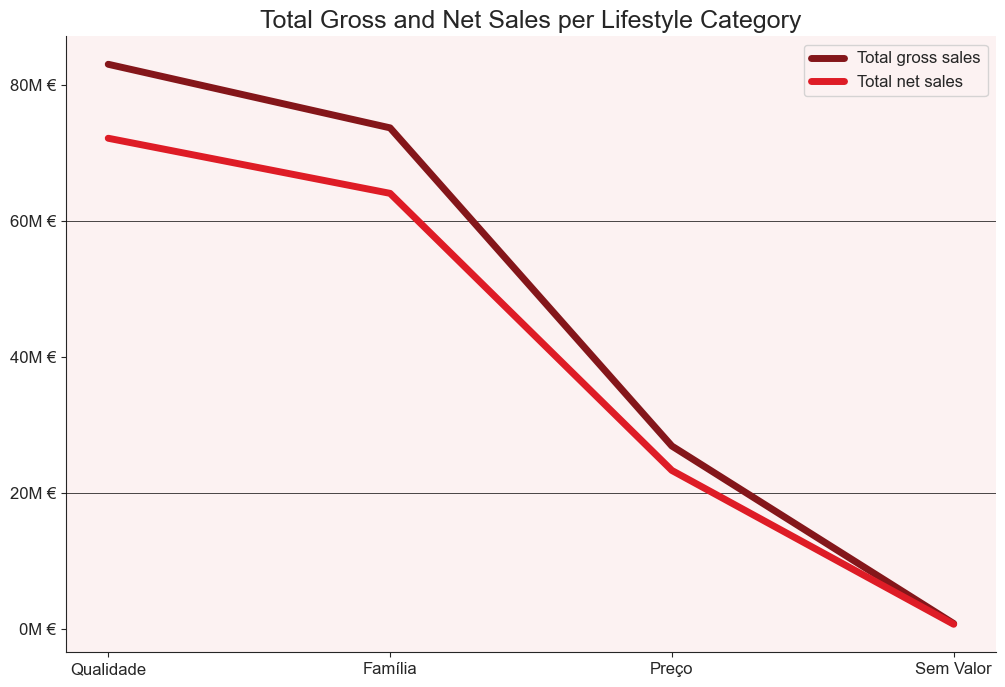

In [4]:
line_plot(lifestyle, 'Total Gross and Net Sales per Lifestyle Category')

In [5]:
query = client.query("""
    SELECT 
        seg_lifestage_dsc, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestage_dsc
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

lifestage = query.result().to_dataframe() # Wait for the job to complete.
lifestage

,seg_lifestage_dsc,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Senior,45765668.55,40139697.36,0.88
1,Family Supporters,6213850.18,5430533.88,0.88
2,Active Adults,55850888.07,48401462.72,0.87
3,Family with Kids,47439386.42,41006872.84,0.87
4,Family w/ Young Adul,26091586.96,22589199.34,0.87
5,No Value,3195512.27,2767681.48,0.87


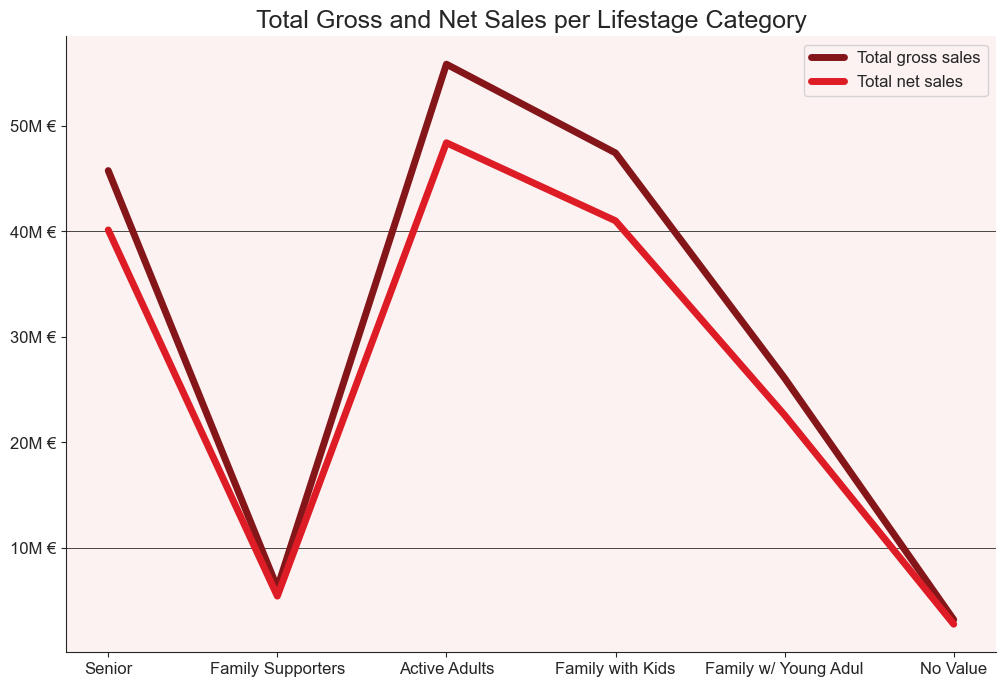

In [6]:
line_plot(lifestage, 'Total Gross and Net Sales per Lifestage Category')

In [7]:
query = client.query("""
    SELECT 
        SEG_AGE_DSC, 
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        SEG_AGE_DSC
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    """)

seg_age = query.result().to_dataframe() # Wait for the job to complete.
seg_age

,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,>65,34837975.04,30576683.51,0.88
1,]55;65],32960505.48,28741932.88,0.88
2,]45;55],43660403.41,37865092.97,0.87
3,]35;45],39698843.18,34331705.53,0.87
4,]25;35],22087666.50,19047107.16,0.87
5,Sem Valor,5555563.67,4827907.49,0.87
6,[0;18],270153.32,234806.06,0.87
7,]18;25],5485781.85,4710212.03,0.86


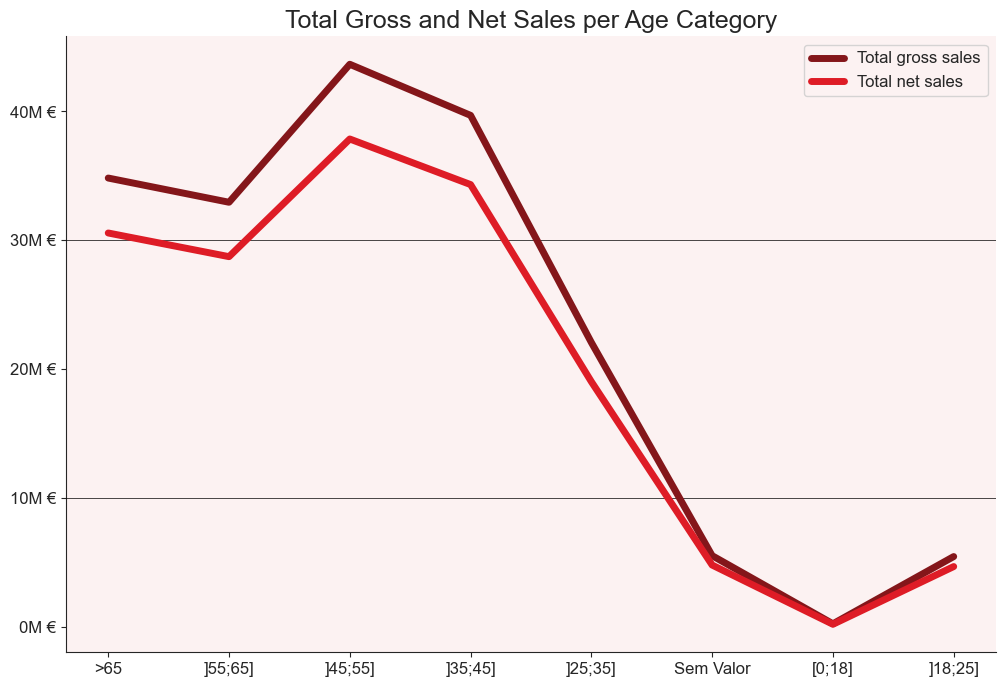

In [8]:
line_plot(seg_age, 'Total Gross and Net Sales per Age Category')

In [9]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,seg_lifestage_dsc,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Preço,Family Supporters,]25;35],25476.85,22676.49,0.90
1,Preço,Senior,[0;18],19283.22,17211.62,0.90
2,Família,Senior,[0;18],8232.39,7334.51,0.90
3,Família,Family Supporters,[0;18],971.73,866.33,0.90
4,Família,Senior,>65,14439569.12,12710226.22,0.89
5,Família,Senior,Sem Valor,362752.55,320124.71,0.89
6,Família,No Value,>65,153604.28,135306.31,0.89
7,Preço,Active Adults,[0;18],47236.41,41818.98,0.89
8,Preço,Family Supporters,Sem Valor,2990.38,2636.52,0.89
9,Sem Valor,Senior,]18;25],2853.77,2513.48,0.89


In [10]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.90
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,seg_lifestage_dsc,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Preço,Family Supporters,]25;35],25476.85,22676.49,0.90
1,Preço,Senior,[0;18],19283.22,17211.62,0.90
2,Família,Senior,[0;18],8232.39,7334.51,0.90
3,Família,Family Supporters,[0;18],971.73,866.33,0.90


In [11]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.89
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,seg_lifestage_dsc,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Família,Senior,>65,14439569.12,12710226.22,0.89
1,Família,Senior,Sem Valor,362752.55,320124.71,0.89
2,Família,No Value,>65,153604.28,135306.31,0.89
3,Preço,Active Adults,[0;18],47236.41,41818.98,0.89
4,Preço,Family Supporters,Sem Valor,2990.38,2636.52,0.89
5,Sem Valor,Senior,]18;25],2853.77,2513.48,0.89
6,Família,Family Supporters,]18;25],1944.79,1725.23,0.89
7,Sem Valor,Senior,[0;18],692.56,612.09,0.89


In [12]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.88
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,seg_lifestage_dsc,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Qualidade,Senior,>65,12250057.64,10734945.00,0.88
1,Qualidade,Active Adults,]55;65],6016164.86,5241504.16,0.88
2,Família,Active Adults,]55;65],4911407.60,4284743.53,0.88
3,Qualidade,Senior,]55;65],4324765.02,3780291.25,0.88
4,Família,Senior,]55;65],4028489.96,3535055.96,0.88
5,Preço,Senior,>65,2928002.24,2566203.68,0.88
6,Família,Family w/ Young Adul,]55;65],2179338.64,1897668.91,0.88
7,Qualidade,Family Supporters,>65,2008627.01,1753920.06,0.88
8,Qualidade,Senior,]45;55],1980895.23,1732646.80,0.88
9,Família,Family Supporters,>65,1898373.15,1662515.56,0.88


In [13]:
query = client.query("""
    SELECT 
        seg_lifestyle_dsc,
        seg_lifestage_dsc,
        SEG_AGE_DSC,
        SUM(GROSS_SLS_AMT) AS total_gross_sales, 
        SUM(NET_SLS_AMT) AS total_net_sales, 
        CEILING(SUM(NET_SLS_AMT)*100/SUM(GROSS_SLS_AMT))/100 AS net_gross_ratio_rounded
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
    GROUP BY 
        seg_lifestyle_dsc, seg_lifestage_dsc, SEG_AGE_DSC
    HAVING 
        net_gross_ratio_rounded=0.87
    ORDER BY 
        net_gross_ratio_rounded DESC, total_net_sales DESC
    LIMIT 20
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,seg_lifestage_dsc,SEG_AGE_DSC,total_gross_sales,total_net_sales,net_gross_ratio_rounded
0,Qualidade,Active Adults,]45;55],9904713.10,8596254.50,0.87
1,Família,Family with Kids,]35;45],9615464.04,8287440.54,0.87
2,Qualidade,Family with Kids,]35;45],9477382.97,8220413.53,0.87
3,Família,Active Adults,]45;55],6969874.14,6048947.13,0.87
4,Qualidade,Active Adults,]35;45],5168241.32,4474283.88,0.87
5,Qualidade,Family w/ Young Adul,]45;55],5114264.37,4436222.31,0.87
6,Qualidade,Active Adults,]25;35],4511666.32,3881890.66,0.87
7,Família,Family with Kids,]25;35],4426771.72,3808195.93,0.87
8,Família,Family with Kids,]45;55],4053331.24,3503513.82,0.87
9,Qualidade,Family with Kids,]45;55],4029757.63,3491153.54,0.87


In [16]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       100.0 * COUNT(*) / SUM(COUNT(*)) OVER() AS market_share
   FROM 
       tables_raw.dim_customer
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       market_share DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,SEG_AGE_DSC,market_share
0,>65,20.47
1,]45;55],19.68
2,]35;45],18.74
3,]55;65],16.01
4,]25;35],13.79
5,Sem Valor,5.55
6,]18;25],5.41
7,[0;18],0.36


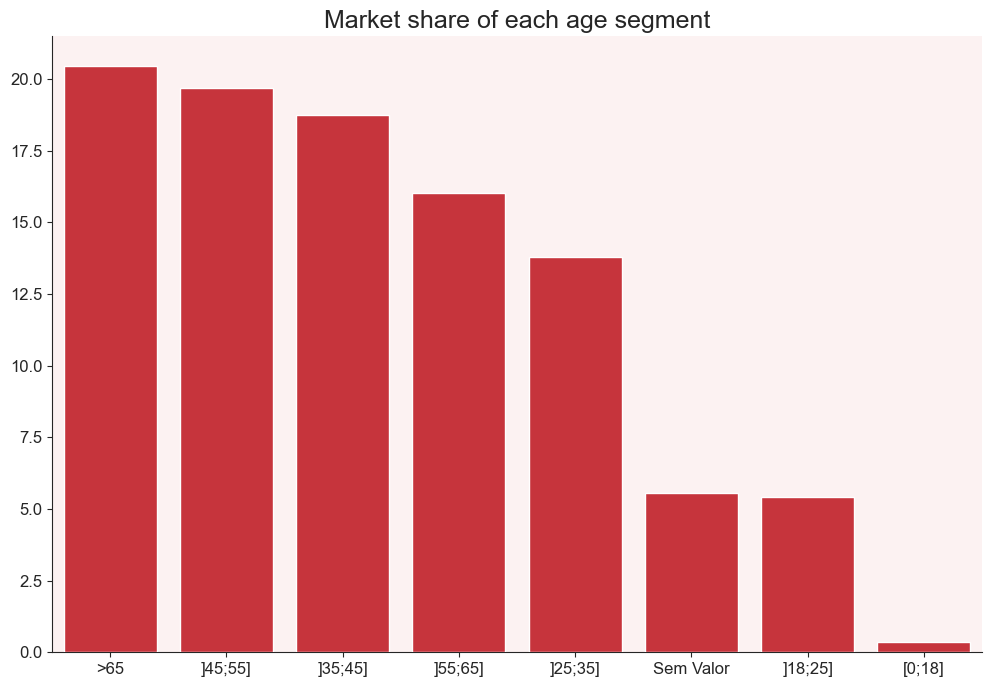

In [17]:
bar_plot(df, 'Market share of each age segment')

In [18]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       AVG(NET_SLS_AMT) AS avg_net_sales 
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       avg_net_sales DESC
   LIMIT 20
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,SEG_AGE_DSC,avg_net_sales
0,[0;18],2.82
1,>65,2.69
2,]55;65],2.53
3,Sem Valor,2.41
4,]45;55],2.40
5,]35;45],2.31
6,]25;35],2.17
7,]18;25],2.03


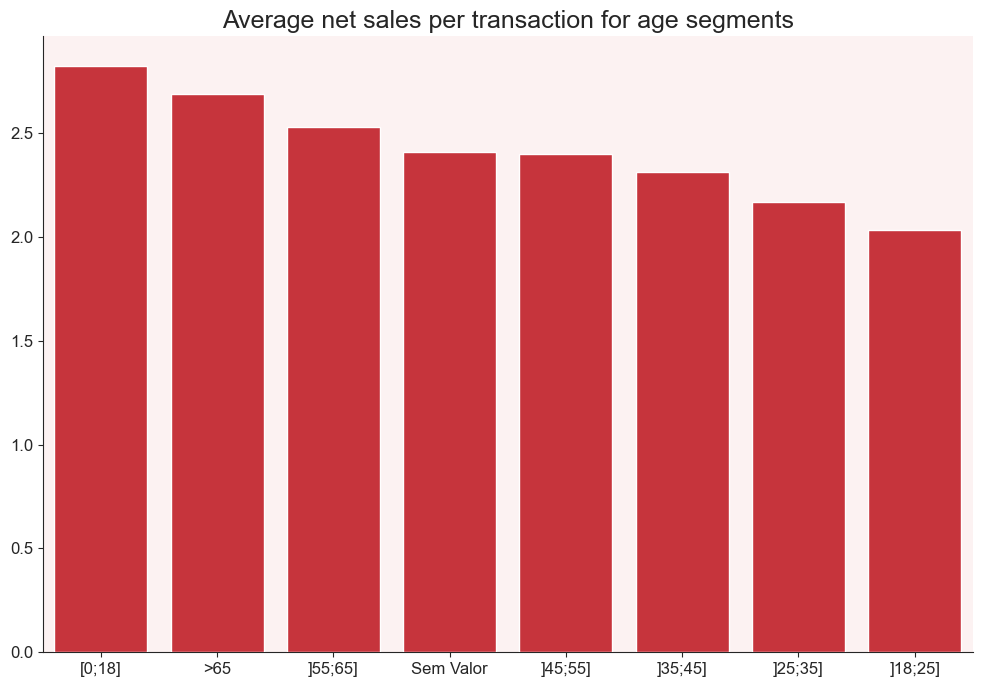

In [19]:
bar_plot(df, 'Average net sales per transaction for age segments')

In [14]:
query = client.query("""
    SELECT 
        seg_lifestage_dsc, COUNT(*) AS num_transactions
    FROM 
        tables_raw.fact_transaction 
        JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
        JOIN tables_raw.dim_location USING(LOCATION_CD)
        JOIN tables_raw.dim_product USING(SKU)
    GROUP BY 
        seg_lifestage_dsc
    ORDER BY
        num_transactions DESC
    """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestage_dsc,num_transactions
0,Active Adults,21732069
1,Family with Kids,17785078
2,Senior,14780013
3,Family w/ Young Adul,9132512
4,Family Supporters,2056353
5,No Value,1082583


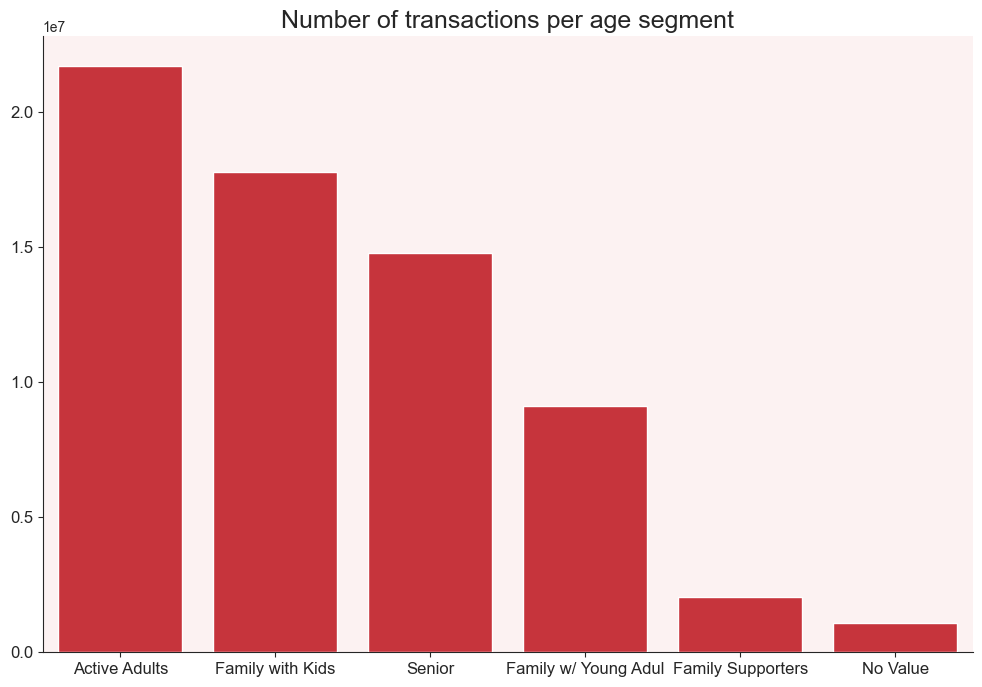

In [15]:
bar_plot(df, 'Number of transactions per age segment')

# Customer-Category Analysis

In [20]:
query = client.query("""
   SELECT 
       SEG_AGE_DSC,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       SEG_AGE_DSC
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,SEG_AGE_DSC,num_categories_bought
0,]35;45],173
1,]55;65],173
2,]25;35],171
3,]45;55],170
4,>65,168
5,]18;25],164
6,Sem Valor,161
7,[0;18],137


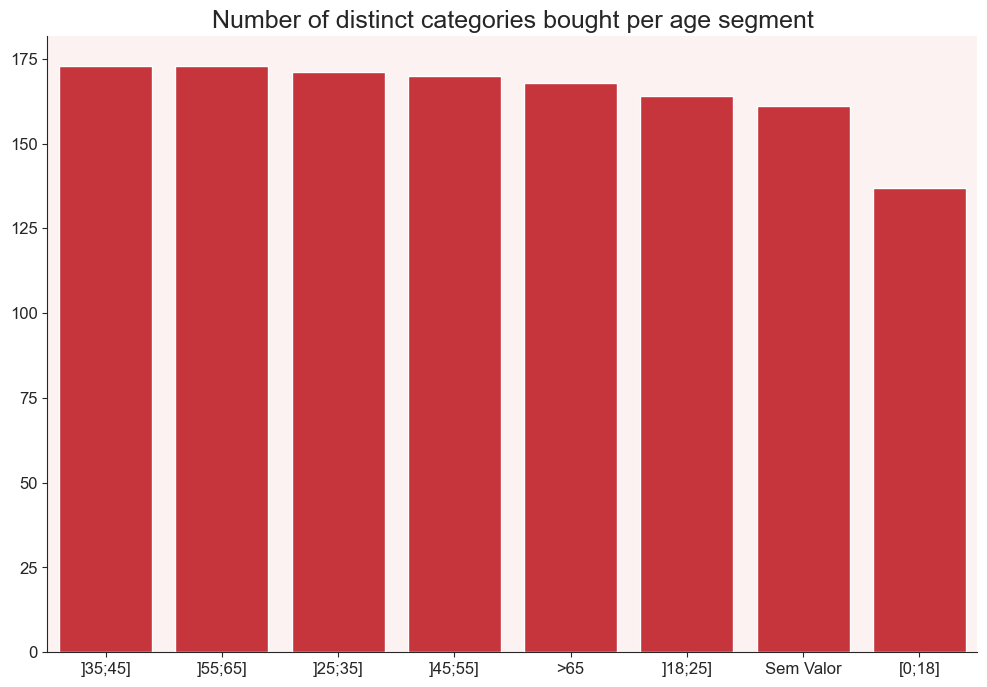

In [21]:
bar_plot(df, 'Number of distinct categories bought per age segment')

In [22]:
query = client.query("""
   SELECT 
       seg_lifestyle_dsc,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       seg_lifestyle_dsc
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestyle_dsc,num_categories_bought
0,Família,174
1,Preço,173
2,Qualidade,173
3,Sem Valor,145


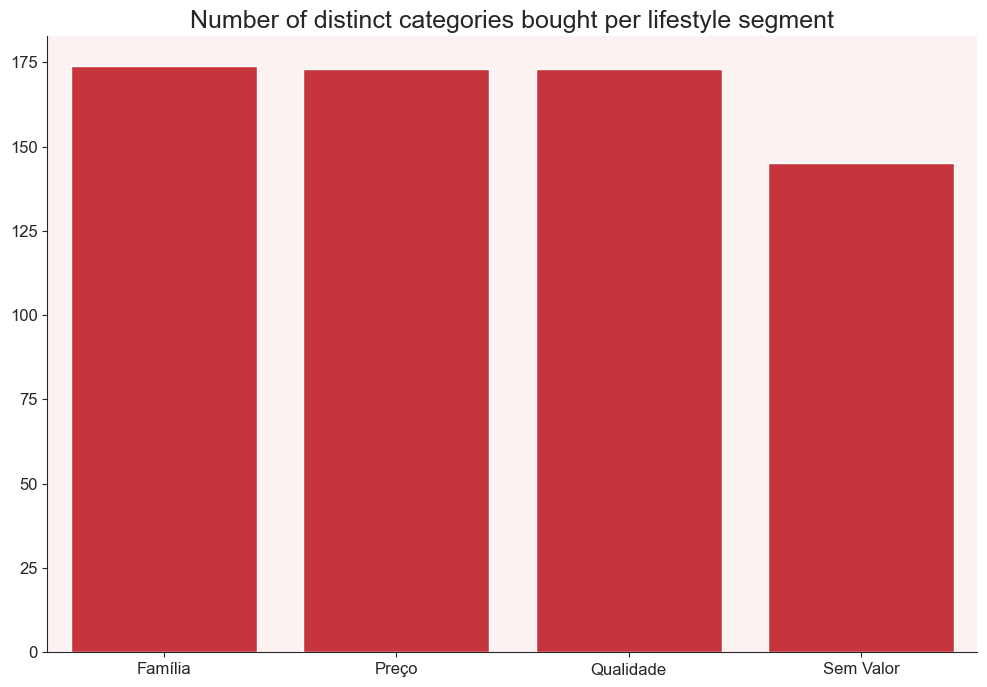

In [23]:
bar_plot(df, 'Number of distinct categories bought per lifestyle segment')

In [24]:
query = client.query("""
   SELECT 
       seg_lifestage_dsc,
       COUNT(DISTINCT CAT_DSC_EXT) AS num_categories_bought
   FROM 
       tables_raw.fact_transaction 
       JOIN tables_raw.dim_customer USING(CUSTOMER_ACCOUNT_NR_MASK)
       JOIN tables_raw.dim_location USING(LOCATION_CD)
       JOIN tables_raw.dim_product USING(SKU)
   GROUP BY 
       seg_lifestage_dsc
   ORDER BY 
       num_categories_bought DESC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,seg_lifestage_dsc,num_categories_bought
0,Family with Kids,172
1,Active Adults,172
2,Senior,169
3,Family w/ Young Adul,166
4,Family Supporters,158
5,No Value,153


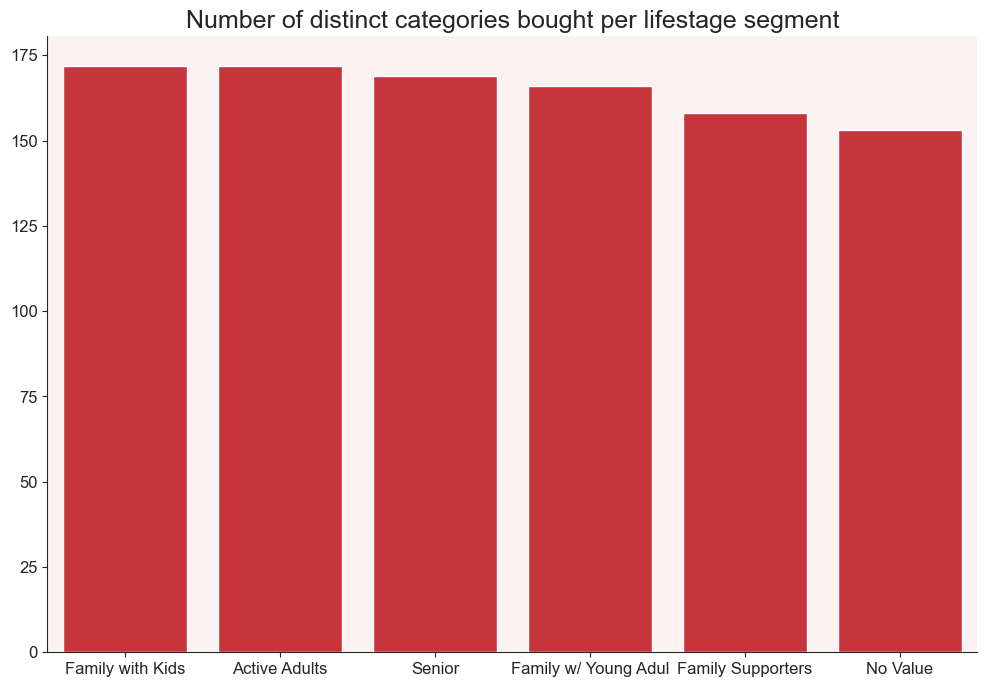

In [25]:
bar_plot(df, 'Number of distinct categories bought per lifestage segment')